USStocks    

In [1]:
# Import necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math

# Import scikit-learn modules
from sklearn import datasets
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_regression
from sklearn.model_selection import GridSearchCV 

In [2]:
US_stocks = pd.read_csv(r"C:\Sravan ML\Machine Learning\Linear regression\US Stock Market Dataset.csv")

In [3]:
US_stocks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1012 entries, 0 to 1011
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1012 non-null   int64  
 1   Date               1012 non-null   object 
 2   Natural_Gas_Price  1012 non-null   float64
 3   Natural_Gas_Vol.   1009 non-null   float64
 4   Crude_oil_Price    1012 non-null   float64
 5   Crude_oil_Vol.     990 non-null    float64
 6   Copper_Price       1012 non-null   float64
 7   Copper_Vol.        976 non-null    float64
 8   Bitcoin_Price      1012 non-null   object 
 9   Bitcoin_Vol.       1012 non-null   int64  
 10  Platinum_Price     1012 non-null   object 
 11  Platinum_Vol.      636 non-null    float64
 12  Ethereum_Price     1012 non-null   object 
 13  Ethereum_Vol.      1012 non-null   int64  
 14  S&P_500_Price      1012 non-null   object 
 15  Nasdaq_100_Price   1012 non-null   object 
 16  Nasdaq_100_Vol.    1011 

In [4]:
US_stocks.isnull().sum()

Unnamed: 0             0
Date                   0
Natural_Gas_Price      0
Natural_Gas_Vol.       3
Crude_oil_Price        0
Crude_oil_Vol.        22
Copper_Price           0
Copper_Vol.           36
Bitcoin_Price          0
Bitcoin_Vol.           0
Platinum_Price         0
Platinum_Vol.        376
Ethereum_Price         0
Ethereum_Vol.          0
S&P_500_Price          0
Nasdaq_100_Price       0
Nasdaq_100_Vol.        1
Apple_Price            0
Apple_Vol.             0
Tesla_Price            0
Tesla_Vol.             0
Microsoft_Price        0
Microsoft_Vol.         0
Silver_Price           0
Silver_Vol.           45
Google_Price           0
Google_Vol.            0
Nvidia_Price           0
Nvidia_Vol.            0
Berkshire_Price        0
Berkshire_Vol.         0
Netflix_Price          0
Netflix_Vol.           0
Amazon_Price           0
Amazon_Vol.            0
Meta_Price             0
Meta_Vol.              0
Gold_Price             0
Gold_Vol.              1
dtype: int64

In [5]:
# Calculate the mean of numeric columns
numeric_columns = US_stocks.select_dtypes(include=[np.number])
column_means = numeric_columns.mean()

# Fill null values with the respective column means
df_filled = US_stocks.fillna(column_means)

# Check if there are any remaining null values
df=df_filled
print(df.isnull().sum())

Unnamed: 0           0
Date                 0
Natural_Gas_Price    0
Natural_Gas_Vol.     0
Crude_oil_Price      0
Crude_oil_Vol.       0
Copper_Price         0
Copper_Vol.          0
Bitcoin_Price        0
Bitcoin_Vol.         0
Platinum_Price       0
Platinum_Vol.        0
Ethereum_Price       0
Ethereum_Vol.        0
S&P_500_Price        0
Nasdaq_100_Price     0
Nasdaq_100_Vol.      0
Apple_Price          0
Apple_Vol.           0
Tesla_Price          0
Tesla_Vol.           0
Microsoft_Price      0
Microsoft_Vol.       0
Silver_Price         0
Silver_Vol.          0
Google_Price         0
Google_Vol.          0
Nvidia_Price         0
Nvidia_Vol.          0
Berkshire_Price      0
Berkshire_Vol.       0
Netflix_Price        0
Netflix_Vol.         0
Amazon_Price         0
Amazon_Vol.          0
Meta_Price           0
Meta_Vol.            0
Gold_Price           0
Gold_Vol.            0
dtype: int64


In [6]:
# Remove commas and spaces from all columns
df = df.replace({',': '', ' ': ''}, regex=True)

In [7]:
# List of columns to process
columns_to_process = ['Natural_Gas_Price', 'Natural_Gas_Vol.', 'Crude_oil_Price', 'Crude_oil_Vol.',
                      'Copper_Price', 'Copper_Vol.', 'Bitcoin_Price', 'Bitcoin_Vol.',
                      'Platinum_Price', 'Platinum_Vol.', 'Ethereum_Price', 'Ethereum_Vol.',
                      'S&P_500_Price', 'Nasdaq_100_Price', 'Nasdaq_100_Vol.',
                      'Apple_Price', 'Apple_Vol.', 'Tesla_Price', 'Tesla_Vol.',
                      'Microsoft_Price', 'Microsoft_Vol.', 'Silver_Price', 'Silver_Vol.',
                      'Google_Price', 'Google_Vol.', 'Nvidia_Price', 'Nvidia_Vol.',
                      'Berkshire_Price', 'Berkshire_Vol.', 'Netflix_Price', 'Netflix_Vol.',
                      'Amazon_Price', 'Amazon_Vol.', 'Meta_Price', 'Meta_Vol.',
                      'Gold_Price', 'Gold_Vol.']

# Convert the columns to float
df[columns_to_process] = df[columns_to_process].astype(float)

In [8]:
x = df[['Natural_Gas_Price', 'Crude_oil_Price', 'Copper_Price', 'Platinum_Price']]
y = df['Gold_Price']
print(x, y)


      Natural_Gas_Price  Crude_oil_Price  Copper_Price  Platinum_Price
0                 2.050            73.82        3.8535          922.30
1                 2.100            75.85        3.9060          932.60
2                 2.077            77.82        3.9110          931.70
3                 2.490            76.78        3.8790          938.30
4                 2.712            78.01        3.8520          921.30
...                 ...              ...           ...             ...
1007              2.141            59.61        2.8120          961.00
1008              2.162            62.70        2.7935          977.75
1009              2.135            63.27        2.7900          969.35
1010              2.130            63.05        2.7870          988.55
1011              2.122            61.18        2.8250          986.90

[1012 rows x 4 columns] 0       2071.1
1       2067.4
2       2050.9
3       2034.9
4       2026.6
         ...  
1007    1560.2
1008    1574.3
100

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=21)
x_train=np.array(x_train)#.reshape(-1, 1)
x_test=np.array(x_test)#.reshape(-1, 1)
y_train=np.array(x_train)#.reshape(-1, 1)
y_test=np.array(x_test)#.reshape(-1, 1)

Text(0, 0.5, 'Gold_Price')

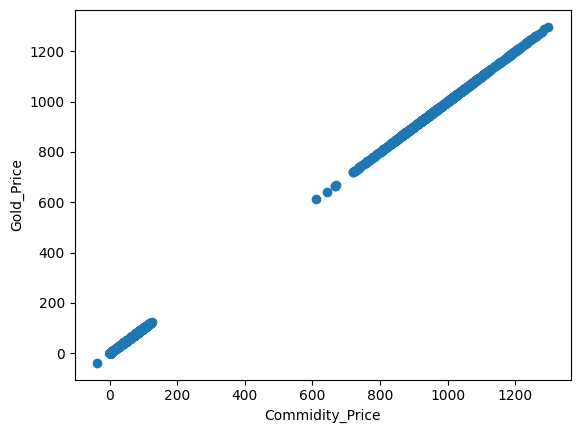

In [10]:
plt.scatter(x_train,y_train)
plt.xlabel("Commidity_Price")
plt.ylabel("Gold_Price")

In [11]:
lr=LinearRegression()

In [12]:
lr.fit(x_train, y_train)

LinearRegression()

In [13]:
c=lr.intercept_
c

array([-1.86517468e-14, -4.26325641e-14, -9.32587341e-14, -2.27373675e-13])

In [14]:
m=lr.coef_
m

array([[ 1.00000000e+00,  3.73189470e-17, -8.15811885e-18,
         2.01269370e-17],
       [-1.13048157e-14,  1.00000000e+00, -1.34961486e-15,
        -5.72458747e-17],
       [ 6.95632265e-15, -9.71445147e-16,  1.00000000e+00,
         1.06143393e-16],
       [ 2.54272058e-15, -1.13624388e-16, -3.45464082e-15,
         1.00000000e+00]])

In [15]:
y_pred=lr.predict(x_train)
y_pred.flatten()

array([  5.401, 112.34 ,   4.726, ...,  46.78 ,   2.586, 875.7  ])

Text(0, 0.5, 'Nasdaq_100_Vol.')

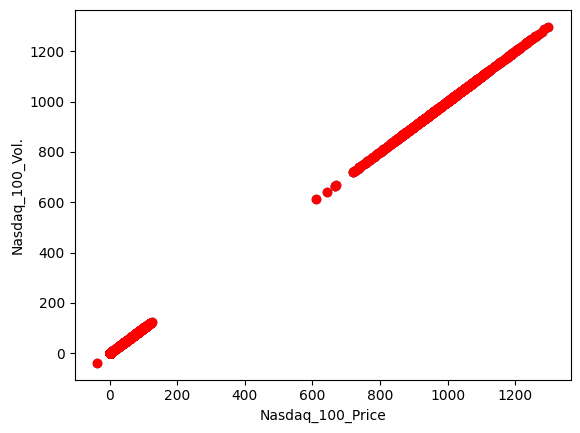

In [16]:
plt.scatter(x_train,y_train)
plt.scatter(x_train,y_pred,color="red")
plt.xlabel("Nasdaq_100_Price")
plt.ylabel("Nasdaq_100_Vol.")

In [17]:
y_pred_test=lr.predict(x_test)
y_pred_test.flatten()

array([   2.03  ,   73.2   ,    4.0855,  971.9   ,    1.654 ,   25.22  ,
          2.1855,  595.2   ,    2.101 ,   68.56  ,    3.863 , 1053.55  ,
          2.78  ,   45.28  ,    3.4845, 1016.1   ,    3.275 ,   80.61  ,
          4.2315, 1041.1   ,    1.772 ,   45.9   ,    2.573 ,  872.95  ,
          2.55  ,   75.57  ,    3.902 ,  995.6   ,    2.657 ,   71.79  ,
          3.7685,  925.    ,    2.77  ,   83.19  ,    3.719 ,  914.6   ,
          2.664 ,   52.34  ,    3.58  , 1076.5   ,    2.665 ,   78.78  ,
          3.902 ,  972.    ,    4.283 ,   86.61  ,    4.4235, 1021.8   ,
          2.585 ,   71.55  ,    3.732 , 1083.8   ,    2.692 ,   64.44  ,
          4.0325, 1206.6   ,    7.954 ,   83.54  ,    3.522 ,  866.5   ,
          2.731 ,   75.68  ,    4.011 ,  941.9   ,    4.059 ,   69.25  ,
          4.36  , 1017.9   ,    5.516 ,   81.27  ,    4.3355, 1036.9   ,
          1.8   ,   41.04  ,    2.9175,  987.65  ,    2.664 ,   65.05  ,
          4.093 , 1156.6   ,    4.928 ,   78.45  , 

Text(0, 0.5, 'Ice Cream Profits')

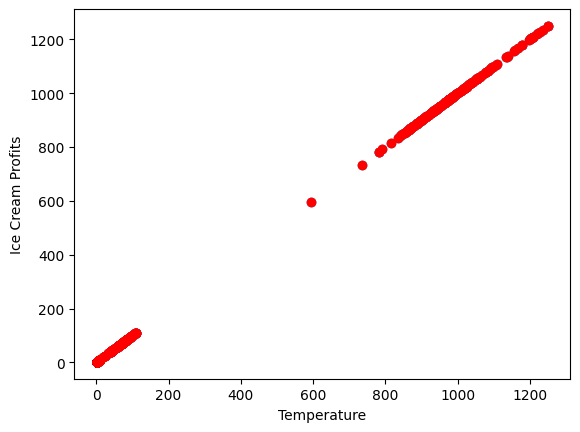

In [18]:
plt.scatter(x_test,y_test)
plt.scatter(x_test,y_pred_test,color="red")
plt.xlabel("Temperature")
plt.ylabel("Ice Cream Profits")

In [19]:
# MSE
mse = mean_squared_error(y_test, y_pred_test)
# RMSE
rmse = math.sqrt(mse)
# MAE
mae = mean_absolute_error(y_test, y_pred_test)
# R2
r2 = r2_score(y_test, y_pred_test)
# print them all
print("MSE --> ", mse)
print("RMSE --> ", rmse)
print("MAE --> ", mae)
print("R2 --> ", r2)          

MSE -->  3.4435005036164213e-28
RMSE -->  1.855667131685104e-14
MAE -->  1.0377030378934838e-14
R2 -->  1.0


In [20]:
# Define a range of alpha values to search
param_grid = {'alpha': [0.1, 1.0, 10.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best alpha value found by grid search
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Initialize Ridge regression with the best alpha value
ridge_tuned = Ridge(alpha=best_alpha)
ridge_tuned.fit(x_train, y_train)

# Evaluate the tuned model
training_score_tuned = ridge_tuned.score(x_train, y_train)
testing_score_tuned = ridge_tuned.score(x_test, y_test)

print("Tuned Training Data Score:", training_score_tuned)
print("Tuned Testing Data Score:", testing_score_tuned)

Best Alpha: 0.1
Tuned Training Data Score: 0.9999999149709169
Tuned Testing Data Score: 0.9999998914638266


In [21]:
# Coefficients and intercept
M = ridge_tuned.coef_
c = ridge_tuned.intercept_

# Predictions on training and testing data
y_train_pred = ridge_tuned.predict(x_train)
y_test_pred = ridge_tuned.predict(x_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("Coefficients (M):", M)
print("Intercept (c):", c)
print("Training Data Metrics:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared Score:", r2_train)
print("Root Mean Squared Error:", rmse_train)
print("\nTesting Data Metrics:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared Score:", r2_test)
print("Root Mean Squared Error:", rmse_test)

Coefficients (M): [[ 9.99931064e-01  4.64506181e-06 -8.78930666e-06 -1.96793199e-07]
 [ 4.64506181e-06  9.99999050e-01  2.15876972e-05 -3.52437801e-08]
 [-8.78930666e-06  2.15876972e-05  9.98825518e-01  3.40471968e-06]
 [-1.96793199e-07 -3.52437788e-08  3.40471960e-06  9.99999978e-01]]
Intercept (c): [ 1.58448228e-04  2.95701240e-06 -4.23726392e-04  1.16330922e-05]
Training Data Metrics:
Mean Squared Error: 3.8411739195768134e-08
Mean Absolute Error: 9.548452114902644e-05
R-squared Score: 0.9999999149709169
Root Mean Squared Error: 0.00019598913030004529

Testing Data Metrics:
Mean Squared Error: 4.2327436506909474e-08
Mean Absolute Error: 0.0001010609226875499
R-squared Score: 0.9999998914638266
Root Mean Squared Error: 0.00020573632763056085


In [22]:
# Define a wider range of alpha values to search
param_grid = {'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best alpha value found by grid search
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Initialize Ridge regression with the best alpha value
ridge_tuned = Ridge(alpha=best_alpha)
ridge_tuned.fit(x_train, y_train)

# Evaluate the tuned model
training_score_tuned = ridge_tuned.score(x_train, y_train)
testing_score_tuned = ridge_tuned.score(x_test, y_test)

print("Tuned Training Data Score:", training_score_tuned)
print("Tuned Testing Data Score:", testing_score_tuned)


Best Alpha: 0.001
Tuned Training Data Score: 0.9999999999914774
Tuned Testing Data Score: 0.9999999999891213


In [23]:
# Define a range of alpha values to search
param_grid = {'alpha': [0.001, 0.1, 1.0, 10.0]}

# Perform grid search with cross-validation
grid_search = GridSearchCV(Ridge(), param_grid, cv=5)
grid_search.fit(x_train, y_train)

# Get the best alpha value found by grid search
best_alpha = grid_search.best_params_['alpha']
print("Best Alpha:", best_alpha)

# Initialize Ridge regression with the best alpha value
ridge_tuned = Ridge(alpha=best_alpha)
ridge_tuned.fit(x_train, y_train)

# Evaluate the tuned model
training_score_tuned = ridge_tuned.score(x_train, y_train)
testing_score_tuned = ridge_tuned.score(x_test, y_test)

print("Tuned Training Data Score:", training_score_tuned)
print("Tuned Testing Data Score:", testing_score_tuned)

Best Alpha: 0.001
Tuned Training Data Score: 0.9999999999914774
Tuned Testing Data Score: 0.9999999999891213


In [24]:
# Coefficients and intercept
M = ridge_tuned.coef_
c = ridge_tuned.intercept_

# Predictions on training and testing data
y_train_pred = ridge_tuned.predict(x_train)
y_test_pred = ridge_tuned.predict(x_test)

# Calculate evaluation metrics
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

print("Coefficients (M):", M)
print("Intercept (c):", c)
print("\nTraining Data Metrics:")
print("Mean Squared Error:", mse_train)
print("Mean Absolute Error:", mae_train)
print("R-squared Score:", r2_train)
print("Root Mean Squared Error:", rmse_train)
print("\nTesting Data Metrics:")
print("Mean Squared Error:", mse_test)
print("Mean Absolute Error:", mae_test)
print("R-squared Score:", r2_test)
print("Root Mean Squared Error:", rmse_test)    


Coefficients (M): [[ 9.99999311e-01  4.64557128e-08 -8.80023748e-08 -1.96776810e-09]
 [ 4.64557140e-08  9.99999991e-01  2.16128883e-07 -3.53157580e-10]
 [-8.80023753e-08  2.16128882e-07  9.99988242e-01  3.40868220e-08]
 [-1.96776840e-09 -3.53155913e-10  3.40867277e-08  1.00000000e+00]]
Intercept (c): [ 1.58455339e-06  2.96535205e-08 -4.24218370e-06  1.16345404e-07]

Training Data Metrics:
Mean Squared Error: 3.849655014615722e-12
Mean Absolute Error: 9.557374038944198e-07
R-squared Score: 0.9999999999914774
Root Mean Squared Error: 1.9620537746493397e-06

Testing Data Metrics:
Mean Squared Error: 4.242149458060041e-12
Mean Absolute Error: 1.0115785733912994e-06
R-squared Score: 0.9999999999891213
Root Mean Squared Error: 2.0596478966221485e-06
